In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


C:\Users\fette00w\AppData\Local\Temp\ipykernel_65560\2639776237.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [14]:
# View all of the classes that automap found
# shows the classes available
Base.classes.keys()

['station', 'measurement']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
mostRecentDate = session.query(func.max(Measurement.date)).first()
mostRecentDate

('2017-08-23',)

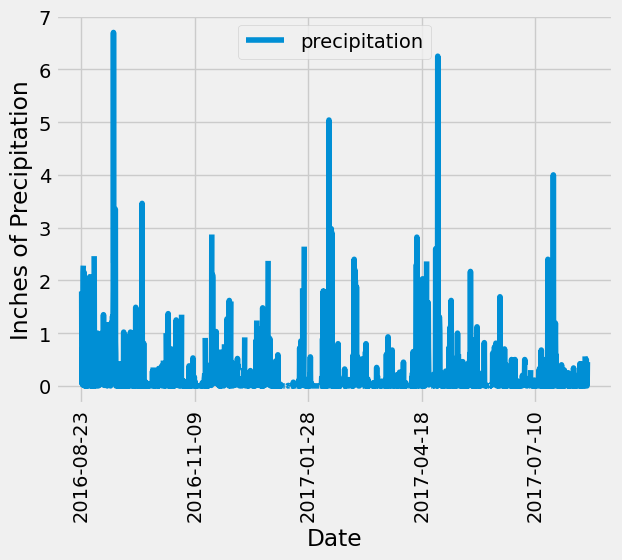

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
#use date calculated above
previousYear = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#previousYear

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previousYear).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
resultDF = pd.DataFrame(results, columns=['date', 'precipitation'])
#resultDF.head()

# Sort the dataframe by date
resultDF = resultDF.sort_values("date")
resultDF.head()

# Use Pandas Plotting with Matplotlib to plot the data
resultDF.plot(x='date', y='precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Inches of Precipitation')
plt.show()


In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
resultDF.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
#displays total number of stations
session.query(func.count(Station.station)).all()

[(9,)]

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#count the stations from the measurement data set, then sort in desc order
session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).\
                all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

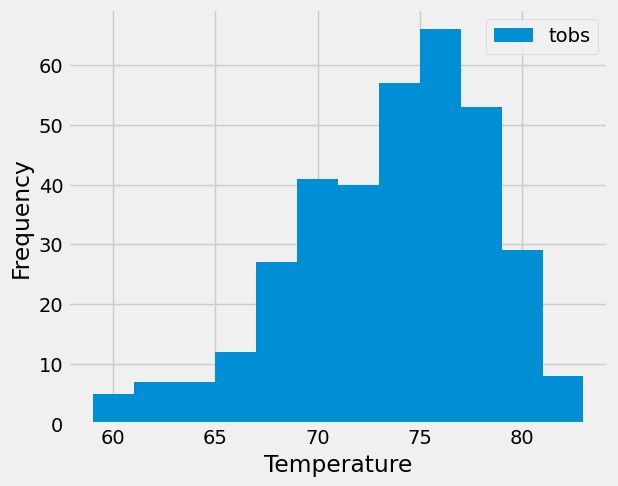

In [23]:
from pandas.plotting import table

# Using the most active station id -> 'USC00519281'
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# from above, the most active station is "USC00519281"
previousYear = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
            filter(Measurement.station == 'USC00519281').\
            filter(Measurement.date >= previousYear).all()

resultDF = pd.DataFrame(results, columns=['tobs'])
#resultDF.head()

resultDF.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel('Temperature')
                        

# Close Session

In [24]:
# Close Session
session.close()